- Bài tập 2 - Mô hình hóa thống kê
- NHÓM 10
- Phạm Thị Hoà - 23C23007
- Trịnh Quang Trí - 23C23011

In [1]:
#library(dplyr)
library(car)
library(MASS)
library(caret)
library(magrittr)
library(ggplot2)
options(warn = -1)
set.seed(42)

Loading required package: carData

Loading required package: ggplot2

Loading required package: lattice



In [2]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)

In [3]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "insurance.csv", sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path,header = TRUE, sep = ",")
# # Xem 6 dòng đầu tiên của dữ liệu
head(df)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


In [4]:
# Kiểm tra số dòng và số cột của dữ liệu:
dim(df)

[1] 1338    7

In [5]:
# Kiểm tra dữ liệu
str(df) # Xem cấu trúc dữ liệu

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [6]:
summary(df)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

In [7]:
# Kiểm tra dữ liệu unique của bộ dữ liệu
for (col in colnames(df)) {
    print(col)
    print(length(unique(df[[col]])))
}


[1] "age"
[1] 47
[1] "sex"
[1] 2
[1] "bmi"
[1] 548
[1] "children"
[1] 6
[1] "smoker"
[1] 2
[1] "region"
[1] 4
[1] "charges"
[1] 1337


- Lựa chọn phân tích phương sai ANOVA một nhân tố với:
    - Y: biến charges
    - X: region: Vị trí địa lý

In [8]:
anova_df = df[,c("region", "charges")]
anova_df[["region"]] = as.factor(anova_df[["region"]])
head(anova_df)

,region,charges
,<fct>,<dbl>
1,southwest,16884.924
2,southeast,1725.552
3,southeast,4449.462
4,northwest,21984.471
5,northwest,3866.855
6,southeast,3756.622


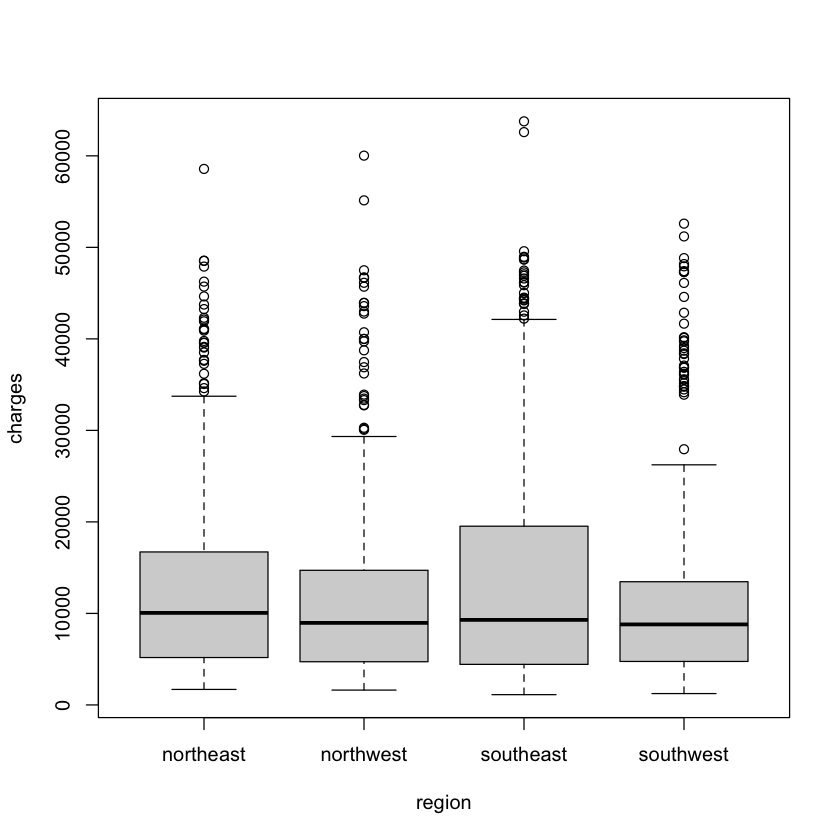

In [9]:
plot(charges ~ region, data = anova_df)

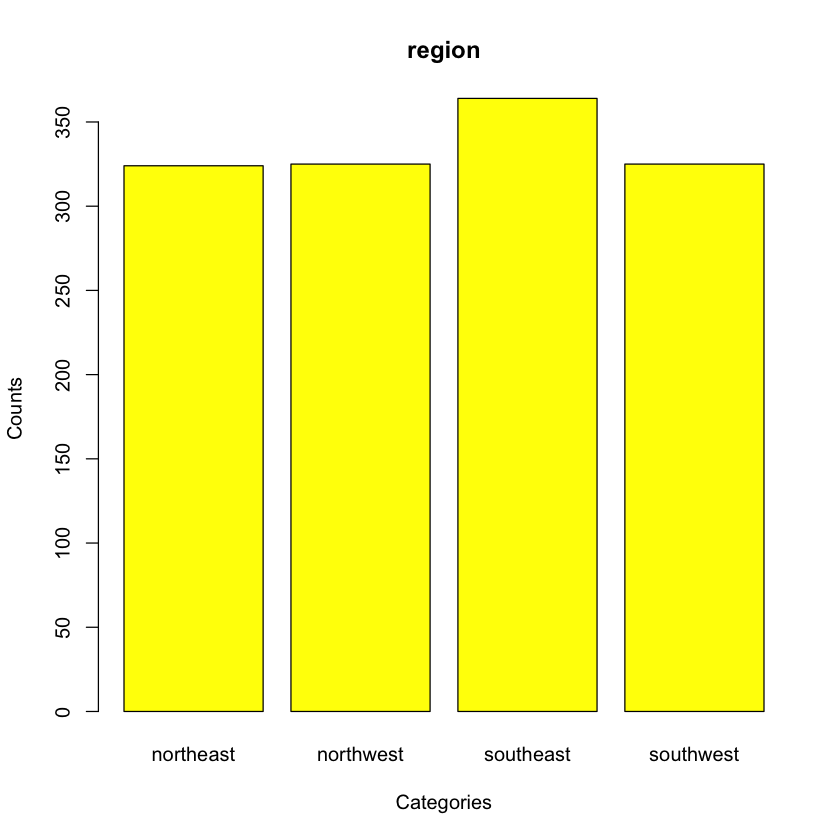

In [10]:

# Tạo bảng tần suất
counts <- table(anova_df[["region"]])
# Vẽ biểu đồ cột
barplot(counts, main = "region", xlab = "Categories", ylab = "Counts", col = "yellow")



### KIỂM TRA DỮ LIỆU KHUYẾT

In [11]:
# Kiểm tra giá trị thiếu
data.frame(colSums(is.na(anova_df)))

,colSums.is.na.anova_df..
,<dbl>
region,0
charges,0


- Dữ liệu không có giá trị thiếu

In [12]:
coag_aov = aov(charges ~ region, data = anova_df)
coag_aov


Call:
   aov(formula = charges ~ region, data = anova_df)

Terms:
                      region    Residuals
Sum of Squares    1300759681 194773461887
Deg. of Freedom            3         1334

Residual standard error: 12083.34
Estimated effects may be unbalanced

In [13]:
summary(coag_aov)

              Df    Sum Sq   Mean Sq F value Pr(>F)  
region         3 1.301e+09 433586560    2.97 0.0309 *
Residuals   1334 1.948e+11 146007093                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- Ý nghĩa thống kê: Kết quả ANOVA cho thấy rằng có sự khác biệt đáng kể về chi phí y tế (charges) giữa các khu vực (region), với giá trị p-value là 0.0309.

- Phân tích kết quả: Mặc dù F-value không cao (2.97), nhưng với giá trị p-value dưới 0.05, chúng ta có đủ bằng chứng để bác bỏ giả thuyết không có sự khác biệt giữa các nhóm region.

### Kết luận:
- Kết quả này cho thấy rằng khu vực có ảnh hưởng đáng kể đến chi phí y tế (charges). Điều này có thể gợi ý rằng các yếu tố địa lý hoặc y tế địa phương có thể đóng vai trò quan trọng trong việc xác định mức độ chi tiêu y tế của mỗi khu vực. Kết quả này cần được xem xét trong các quyết định chính sách hoặc trong việc phân bổ nguồn lực y tế hiệu quả.

In [14]:
region = data.frame(region = unique(anova_df$region))

data.frame(region, coag = predict(coag_aov, region))

,region,coag
,<fct>,<dbl>
1,southwest,12346.94
2,southeast,14735.41
3,northwest,12417.58
4,northeast,13406.38


In [15]:
with(anova_df, pairwise.t.test(charges, region, p.adj = "none"))


	Pairwise comparisons using t tests with pooled SD 

data:  charges and region 

          northeast northwest southeast
northwest 0.2974    -         -        
southeast 0.1501    0.0121    -        
southwest 0.2643    0.9406    0.0097   

P value adjustment method: none 

- Cặp so sánh southeast vs northwest có giá trị p-value là 0.0121, dưới mức ý nghĩa thống kê (0.05), chỉ ra sự khác biệt đáng kể về chi phí y tế giữa hai khu vực này.
- Cặp so sánh southwest vs southeast có giá trị p-value là 0.0097, cũng dưới mức ý nghĩa thống kê, ngụ ý rằng có sự khác biệt đáng kể về chi phí y tế giữa hai khu vực này.
- Các so sánh khác như northwest vs northeast, southwest vs northeast, southwest vs northwest, và southeast vs northeast không đạt mức ý nghĩa thống kê (giá trị p-value lớn hơn 0.05).


In [16]:
with(anova_df, pairwise.t.test(charges, region, p.adj = "bonferroni"))


	Pairwise comparisons using t tests with pooled SD 

data:  charges and region 

          northeast northwest southeast
northwest 1.000     -         -        
southeast 0.901     0.072     -        
southwest 1.000     1.000     0.058    

P value adjustment method: bonferroni 

- Cặp so sánh southeast vs northwest có giá trị p-value là 0.072, lớn hơn mức ý nghĩa thống kê (0.05) sau khi điều chỉnh, ngụ ý rằng không có sự khác biệt đáng kể về chi phí y tế giữa hai khu vực này sau khi điều chỉnh.
- Cặp so sánh southwest vs southeast có giá trị p-value là 0.058, gần với mức ý nghĩa thống kê, có thể ngụ ý rằng có sự khác biệt đáng kể về chi phí y tế giữa hai khu vực này sau khi điều chỉnh, mặc dù kết quả này cần được xem xét cẩn thận.
- Các so sánh khác như northwest vs northeast, southeast vs northeast, southwest vs northeast, southwest vs northwest, và southeast vs southwest đều có giá trị p-value lớn hơn mức ý nghĩa thống kê (0.05) sau khi điều chỉnh, ngụ ý rằng không có sự khác biệt đáng kể về chi phí y tế giữa các khu vực này.


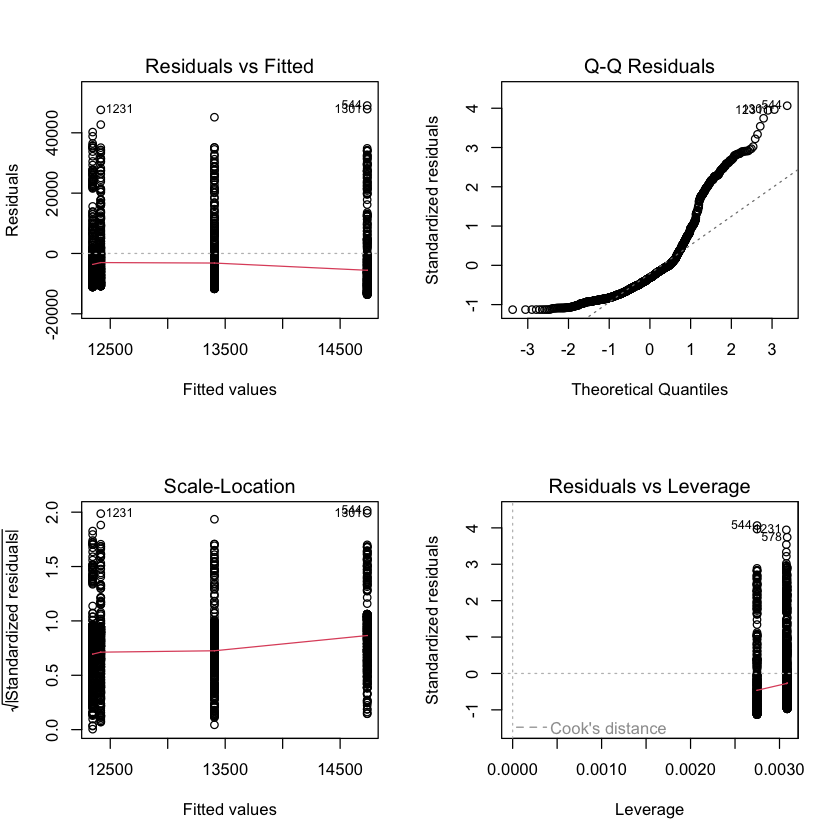

In [17]:
# Plot residuals
par(mfrow = c(2, 2))
plot(coag_aov)

In [18]:
# Thực hiện Shapiro-Wilk test
shapiro.test(coag_aov$residuals)


	Shapiro-Wilk normality test

data:  coag_aov$residuals
W = 0.8274, p-value < 2.2e-16


- Kết quả của Shapiro-Wilk normality test:
    - Statistic (W): 0.8274
    - Giá trị p-value: < 2.2e-16 (rất gần bằng không)
- Phân tích: giá trị p-value rất nhỏ, gần bằng không, cho thấy có bằng chứng đủ để bác bỏ giả thuyết H0 rằng dữ liệu tuân theo phân phối chuẩn.